<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T13_AssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Regras de Associação
---

**Regras de Associação** ou ainda **Market Basket Analysis** são é uma técnica que permite identificar relações subjacentes entre diferentes itens. Em Supermercado, por exemplo,  clientes podem comprar uma variedade de itens e normalmente podemos encontrar um padrão no que os clientes compram. Mães compram produtos para bebês, como leite e fraldas e mulheres podem comprar itens de maquiagem e produtos para limpeza de pele, e outros compram cervejas e carne para churraco. Assim as transações envolvem um padrão.
As **Regras de Associação** permitem identificar esse padrão o que é um **aprendizado não supervisionado** sobre os dados.

Isso tem um um impacto bastante positivo para os consumidores mas também é de interesse para indústria que podem **aumentar a sua margem ofertando mais produtos** com maior mais probabilidade de conversão de vendas e também para o **planejamento da produção** de itens que são normalmente consumidos juntos.  

> Você pode querer acessar também [Capítulo 5 - Análise de Associações](https://www-users.cse.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf) 

![imagem](https://www-users.cse.umn.edu/~kumar001/dmbook/dmbook_2ed_small.jpg)




# Usos de Regras de Associação

Você pode imaginar que regras de associação só tenham uso para fazer a recomendação de produtos que tenham maior potencial de serem adquiridos juntos. De fato Regras de Associação parecem ser o **primeiro modelo de Sistemas de Recomendação** depois do modelo ingênuo de **Recomendação por Popularidade** (simplesmente recomendar itens mais vendidos). Mas elas podem ir muito mais além do que isso. Identificados itens associados diversas estratégias podem ser empregadas para maximizar lucros e planejar a produção:

> * Os itens podem ser colocados juntos na loja para aumentar a chance de que o cliente adquira o outro produto.

> * Campanhas de marketing ou vendas para  pessoas que compram um dos produtos podem ser direcionadas para que o cliente compre o outro produto com maior chance de realização da venda

> * Criação de 'pacotes' dos produtos com descontos oferencendo um 'novo produto' que faz sentido para os clientes

> * Previsão da demanda associada dos produtos 

> * Otimizações da produção e estoque dos produtos. Os produtos, por exemplo, podem ser embalados ou transportados juntos, ou estocados próximos para mais fácil acesso




# Conceitos

A construção e análise de regras de associação envolve basicamente:

> * Análise de cesta de compras
>> * Construir regras de associação
>> * Identifique itens frequentemente comprados juntos

> * Regras de associação, que são da forma
>> * {antecedente} → {consequente}

Como por exemplo {ficção} → {biografia}.

Assim, basicamente trabalharemos a frequencia dos itens e as regras que associam um produto a outro.

# Tipos de Regras de Associação

* Contém antecedente e conseqüente (ou premissa e conclusão)
> {saúde} → {culinária}
* Regra multi-antecedente
> {humor, viagem} → {idioma}
* Regra multi-conseqüente
> {biografia} → {história, idioma}
* Regra multi-antecedente e consequente
> {biografia, não ficção} → {história, linguagem}

Selecionar regras regras úteis é bastante difícil. O conjunto de todas as regras possíveis é bastante grande (combinatória dos valores) e a maioria das regras não serão úteis. O problema pode ser menor se nos restringimos a regras simples (apenas um antecedente e um consequente), mas mesmo assim isso pode ser um grande desafio pois o número de regras possíveis aumenta exponencialmente. 

$$ C^n_k = \frac{n!}{k!(n-k)!} $$

No livro texto (citado acima) vocês podem encontrar também a seguinte fórmula para o cálculo de número de regras para $n$ produtos:

$$N_{rules} = 3^n − 2^{n+1}  + 1$$

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 130)

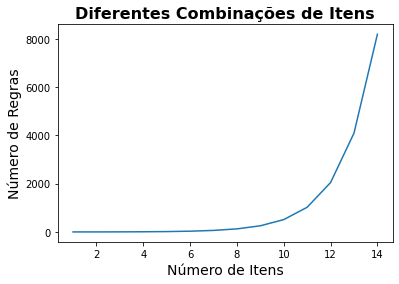

In [32]:
import scipy.special as s

x = np.arange(1,15)
C_nk = []

for n in range(len(x)): 
  soma = 0
  for k in range(1,n):
    soma = soma + s.factorial(n)/(s.factorial(k)*s.factorial(n-k))
  C_nk.append(soma)

plt.plot(x,np.array(C_nk))
plt.title('Diferentes Combinações de Itens', fontsize=16, weight='bold')
plt.xlabel('Número de Itens', fontsize=14)
plt.ylabel('Número de Regras', fontsize=14)
plt.show()

In [33]:
from itertools import permutations
k = 2
p = list(permutations(['Tomada','Furadeira','Broca','Bateria'],2))

p

[('Tomada', 'Furadeira'),
 ('Tomada', 'Broca'),
 ('Tomada', 'Bateria'),
 ('Furadeira', 'Tomada'),
 ('Furadeira', 'Broca'),
 ('Furadeira', 'Bateria'),
 ('Broca', 'Tomada'),
 ('Broca', 'Furadeira'),
 ('Broca', 'Bateria'),
 ('Bateria', 'Tomada'),
 ('Bateria', 'Furadeira'),
 ('Bateria', 'Broca')]

Já já você vai descobrir que são diferentes as regras:

> **Bateria → Furadeira**

> **Furadeira → Bateria**

# Métricas e poda 

As métricas são medidas de desempenho para regras e irão servir para selecionarmos as métricas mais importantes e úteis das demais.

> **{humor} → {poesia}**, métrica = 0,85

> **{ficção} → {viagem}**, métrica = 0,25

Se temos as métricas acima e definimos um *threshold*, limite mínimo, de 0.5 para essa métrica de desempenho vamos:

> Manter: **{humor} → {poesia}**

> Descartar: **{ficção} → {viagem}**


# Suporte

A métrica mais simples é o *Suporte* e o compartilhamento de transações que contêm um conjunto de itens.

$$ Support(X)= \frac{ freq(X) }{N} $$
$$ Support(X→Y)=\frac{ freq(X \cap Y) }{ N } $$

Ela é uma medida de quão frequente a regra é no domínio das transações.



# Confiança
Esta métrica mede a frequência com que os itens em Y aparecem em transações que contêm X e é dado pela fórmula.

$$ Confidence( X→ Y) = \frac{Support( X→ Y)}{Support( X)} $$



E agora já podemos entender que as regras abaixo são de fato diferentes:

> **R1** = Bateria → Furadeira

> **R2** = Furadeira → Bateria

Pois teremos 

$$S = Support(Bateria → Furadeira) = Support(Furadeira → Bateria) = \frac{ freq(Furadeira \cap Bateria) }{ N } $$

mas havendo quantidades diferentes de ocorrências de cada produto, isto é, 

$$Support(Bateria) \neq Support(Furadeira)$$ 

teremos,  

$$Confidence( Bateria → Furadeira) = \frac{S}{Support(Bateria)} $$
$$\neq$$ $$\frac{S}{Support(Furadeira)} = Confidence(Furadeira →  Bateria)$$



O significado por trás dessa métrica é a fração em que se a premissa da regra ocorre a conclusão também irá ocorrer.

# Elevação ou Lift

Esse valornos informa a probabilidade de o item Y ser comprado junto com o item X com relação ao que poderíamos supor apenas avaliando os valores de suporte individuais. 

$$ Lift( X→ Y) = \frac{ Support( X→ Y)} {Support( X) × Support( Y)}$$

$ Lift() > 1 $ diz que os dois itens ocorrem em transações conjuntas com mais frequência do que esperaríamos com base em seus valores de suporte individuais. Isso significa que é improvável que a relação seja explicada por acaso e esse limite natural é conveniente para fins de filtragem.

$ Lift() < 1 $ diz que os dois itens são emparelhados com menos frequência nas transações do que esperaríamos se os emparelhamentos ocorressem por acaso.

# Regras de Associação *not in*  `scikit-learn`

As regras de associação permanecem fora das tarefas principais nas quais o `scikit-learn` se concentra e não se ajusta perfeitamente à API. Os pacotes mais comumente empregados são hoje o [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) e o [apyori](https://pypi.org/project/apyori/). 

Diferentemente do `scikit-learn` esses pacotes normalmente não encontram-se previamente instalados e você precisa instalar os pacotes antes de empregá-los.

# Preparação dos dados

Como em outros processos de análise de dados muitas vezes a maior parte do trabalho se concentra na *Preparação dos Dados* para empregar nos modelos. 

Veja abaixo as diferentes organizações de dados para os pacotes [mlxtend](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) e o [apyori](https://pypi.org/project/apyori/). O primeiro emprega uma tabela de transações dos items, em que cada item participante de uma transação aparece com 1 ou TRUE. Já o segundo cada transação corresponde a uma lista de itens. 

## Install Packages

In [34]:
!pip install apyori 

In [35]:
!pip install mlxtend

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 130)

# Um exemplo de Brinquedo

## Dados Originais

Eles podem diferir muito e normalmente várias transformações precisam ser empregadas para se chegar ao formato de aplicação nos modelos.

In [37]:
invoice_nr = [101,201,201,302,302,421]
product_name = ['Tomada','Furadeira','Broca','Furadeira','Bateria','Interruptor']
product_qty = [5,3,8,4,4,5]

invoices = pd.DataFrame({'invoice_nr':invoice_nr,
                         'product_name':product_name,
                         'product_qty':product_qty})

invoices

,invoice_nr,product_name,product_qty
0,101,Tomada,5
1,201,Furadeira,3
2,201,Broca,8
3,302,Furadeira,4
4,302,Bateria,4
5,421,Interruptor,5


## Criando a Tabela de Transações

In [38]:
transactions = pd.pivot_table(data=invoices, index='invoice_nr', columns='product_name', values='product_qty', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions.columns.name = ''
transactions.head()

,Bateria,Broca,Furadeira,Interruptor,Tomada
invoice_nr,,,,,
101,0,0,0,0,5
201,0,8,3,0,0
302,4,0,4,0,0
421,0,0,0,5,0


In [39]:
transactions = transactions.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions

,Bateria,Broca,Furadeira,Interruptor,Tomada
invoice_nr,,,,,
101,0,0,0,0,1
201,0,1,1,0,0
302,1,0,1,0,0
421,0,0,0,1,0


## Aplicando o `mlxtend`


In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions, min_support = 0.05, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

   antecedents  consequents  antecedent support  consequent support  support  \
1    (Bateria)  (Furadeira)                0.25                0.50     0.25   
2      (Broca)  (Furadeira)                0.25                0.50     0.25   
0  (Furadeira)    (Bateria)                0.50                0.25     0.25   
3  (Furadeira)      (Broca)                0.50                0.25     0.25   

   confidence  lift  leverage  conviction  
1         1.0   2.0     0.125         inf  
2         1.0   2.0     0.125         inf  
0         0.5   2.0     0.125         1.5  
3         0.5   2.0     0.125         1.5  


## Aplicando o `apyori`

O `apyori` é um pacote mais simples e cada transações é representada por uma lista de itens.

In [41]:
transactions_apriori = []

for index, row in transactions.iterrows():
  t = []
  for c in row.index:
    if row[c] > 0:
      t.append(c)
  transactions_apriori.append(t) 

transactions_apriori  

[['Tomada'], ['Broca', 'Furadeira'], ['Bateria', 'Furadeira'], ['Interruptor']]

In [42]:
from apyori import apriori  

frq_items = apriori(transactions_apriori,min_support=0.05,min_confidance=0.2,min_lift=2,min_length=2)

rules = pd.DataFrame(list(frq_items))
print(rules.head())

                  items  support  \
0  (Furadeira, Bateria)     0.25   
1    (Broca, Furadeira)     0.25   

                                  ordered_statistics  
0  [((Bateria), (Furadeira), 1.0, 2.0), ((Furadei...  
1  [((Broca), (Furadeira), 1.0, 2.0), ((Furadeira...  


# **CASE**: UK Online Retail Data Set

Este é um conjunto de dados transacionais que contém cerca de 500K transações ocorridas entre 01/12/2010 e 09/12/2011 para uma rede de varejo online com sede no Reino Unido. Mais detalhes você encontra [aqui](http://archive.ics.uci.edu/ml/datasets/Online+Retail).



## Exploração Inicial dos Dados

In [13]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.shape

(541909, 8)

In [45]:
df.Description.nunique() 

4207

As operações foram realizadas em diferentes países, incluindo o Brasil.

In [46]:
df.Country.value_counts()[0:10]

United Kingdom    486168
Germany             9042
France              8408
EIRE                7894
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Name: Country, dtype: int64

Mas há um único `invoice` com $32$ itens para o Brasil neste período.

In [16]:
df[ df.Country == 'Brazil' ].Country.value_counts()

Brazil    32
Name: Country, dtype: int64

In [17]:
df[ df.Country == 'Brazil' ].Country.value_counts('InvoiceNo')

Brazil    1.0
Name: Country, dtype: float64

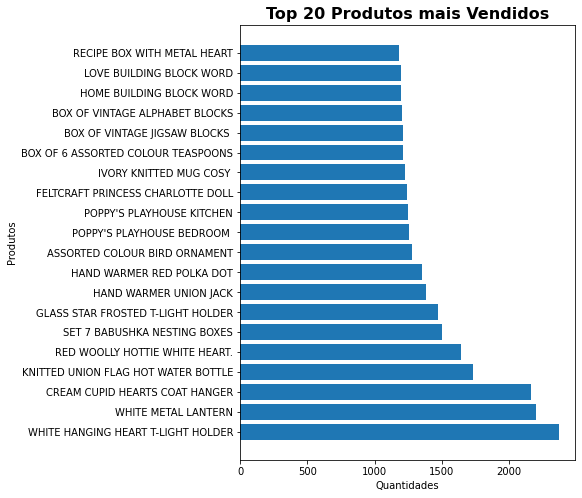

In [18]:
plt.figure(figsize=(6,8))
n = 20
plt.barh(df.Description[0:n], df.Description.value_counts()[0:n])
plt.title('Top ' + str(n) + ' Produtos mais Vendidos', fontsize=16, weight='bold')
plt.xlabel('Quantidades')
plt.ylabel('Produtos')
plt.show()

In [19]:
df.Description.value_counts()[0:10]

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

## Preparação dos dados

Por hora vamos apenas eliminar valores ausentes em atributos que nos interessam.

In [47]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133243
Country             0
dtype: int64

In [21]:
df = df.dropna(axis = 0, subset =['Description'])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

Vamos excluir também operações feitas com crédito (devoluções, a descrição disso encontra-se na documentação dos dados):

In [22]:
len(df)

540455

In [23]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
len(df)

531167

## Criando a Tabela de Transações

Nós vamos aqui emprear o pacote `mlxtend` e portanto precisamos construir a tabela de transações. Vamos trabalhar somente com os dados de um país apenas para reduzir a quantidade de dados neste exemplo.

In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
transactions_FR = pd.pivot_table(data=df[ df.Country == 'France'], index='InvoiceNo', columns='Description', values='Quantity', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions_FR.columns.name = ''
transactions_FR.head()

,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,...,WIRE EGG BASKET,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET BEST WISHES,WOOD STAMP SET FLOWERS,WOOD STAMP SET HAPPY BIRTHDAY,WOOD STAMP SET THANK YOU,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN OWLS LIGHT GARLAND,WOODEN PICTURE FRAME WHITE FINISH,WOODEN REGATTA BUNTING,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
transactions_FR.shape 

(392, 1564)

In [27]:
transactions_FR = transactions_FR.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions_FR

,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,6PC WOOD PLATE SET DISPOSABLE,72 SWEETHEART FAIRY CAKE CASES,A PRETTY THANK YOU CARD,ABC TREASURE BOOK BOX,ADULT APRON APPLE DELIGHT,ADVENT CALENDAR GINGHAM SACK,AGED GLASS SILVER T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,...,WIRE EGG BASKET,WOOD BLACK BOARD ANT WHITE FINISH,WOOD STAMP SET BEST WISHES,WOOD STAMP SET FLOWERS,WOOD STAMP SET HAPPY BIRTHDAY,WOOD STAMP SET THANK YOU,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN HAPPY BIRTHDAY GARLAND,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN OWLS LIGHT GARLAND,WOODEN PICTURE FRAME WHITE FINISH,WOODEN REGATTA BUNTING,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN SKITTLES GARDEN SET,WOODEN STAR CHRISTMAS SCANDINAVIAN,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODEN UNION JACK BUNTING,WOODLAND HEIGHT CHART STICKERS,WOODLAND STICKERS,WOODLAND BUNNIES LOLLY MAKERS,WOODLAND CHARLOTTE BAG,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Aplicando o `mlxtend`


In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions_FR, min_support = 0.05, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents  \
44                        (JUMBO BAG WOODLAND ANIMALS)   
260  (RED TOADSTOOL LED NIGHT LIGHT, PLASTERS IN TI...   
271  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                         consequents  antecedent support  consequent support  \
44                         (POSTAGE)            0.076531            0.765306   
260                        (POSTAGE)            0.051020            0.765306   
271                        (POSTAGE)            0.053571            0.765306   
302  (SET/6 RED SPOTTY PAPER PLATES)            0.102041            0.127551   
301    (SET/6 RED SPOTTY PAPER CUPS)            0.102041            0.137755   

      support  confidence      lift  leverage  conviction  
44   0.076531       1.000  1.306667  0.017961         inf  
260  0.051020       1.000  1.306667  0.011974     

A análise dos dados acima indica que copos, guardanapos e pratos de papel são comprados juntos na França e, de fato, os Franceses são conhecidos por fazer reuniões de amigos e familiares e há muitos anos a França proibiu os itens de plático para refeições.

Você ainda pode tentar fazer a análise revisando os dados. Note que existem muitos itens com `POSTAGE`, um item que pode ser óbvio no caso de entregas e que podemos eliminar antes de criarmos o conjunto de transações. 

```
df.drop('POSTAGE', inplace=True, axis=1)
```

Muitas outras operações como essas podem ser feitas selecionando e agrupando itens de produtos trantando as *strings* de nomes dos produtos, o que realmente é muitas vezes feito e necessário, mas não nos aprofundaremos nisso aqui.


## Uma Nova Análise

Podemos fazer ainda a mesma análise para a Inglaterra, que tem uma quantidade muito maior de dados. Note que aqui vamos ter de abaixar o `min_support` pois, se empregarmos o mesmo valor que empregamos na análise anterior, não restaram regras!

In [29]:
transactions_UK = pd.pivot_table(data=df[ df.Country == 'United Kingdom'], index='InvoiceNo', columns='Description', values='Quantity', 
                              aggfunc='sum',fill_value=0) # .reset_index()  
transactions_UK.columns.name = ''
transactions_UK = transactions_UK.applymap(lambda x: 0 if x == 0 else 1) # use transactions[transactions.columns[0::]] se empregar .reset_index()  
transactions_UK.shape

(18668, 4188)

In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

# Construindo o modelo
frq_items = apriori(transactions_UK, min_support = 0.01, use_colnames = True)
 
# Coletando as regras de inferência em um dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                       antecedents             consequents  \
117           (BEADED CRYSTAL HEART PINK ON STICK)        (DOTCOM POSTAGE)   
2012  (SUKI  SHOULDER BAG, JAM MAKING SET PRINTED)        (DOTCOM POSTAGE)   
2286         (HERB MARKER THYME, HERB MARKER MINT)  (HERB MARKER ROSEMARY)   
2294   (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)     (HERB MARKER THYME)   
2293      (HERB MARKER THYME, HERB MARKER PARSLEY)  (HERB MARKER ROSEMARY)   

      antecedent support  consequent support   support  confidence       lift  \
117             0.011035            0.037926  0.010767    0.975728  25.727250   
2012            0.011624            0.037926  0.011196    0.963134  25.395168   
2286            0.010714            0.012374  0.010231    0.955000  77.177229   
2294            0.011088            0.012321  0.010553    0.951691  77.244192   
2293            0.011088            0.012374  0.010553    0.951691  76.909802   

      leverage  conviction  
117   0.010349 

<img src="https://acultivatednest.com/wp-content/uploads/2013/06/creative-plant-marker-ideas-500px.jpg"  width=300, align="center">

Aparentemente os britânicos costumam comprar vários *herb markers* diferentes juntos e, portanto, um fornecedor ou fabricante precisa ter uma grande diversidade desses itens para atrair os seus clientes.

# Outras métricas Leverage e Conviction

Você deve ter notado que aparecem outras métricas ao empregar o pacote `mlxtent`. A métrica de alavancagem ou *leverage* também se baseia no suporte. Ela é semelhante à elevação, mas normalmente é mais fácil de interpretar.

$$ Leverage(X→Y)=Support(X \cap Y)−Support(X)Support(Y)$$
 
A alavancatem é um valor entre $- 1$  e  $+ 1$ enquanto a elevação (lift) varia de  $0$  ao infinito sendo o ponto de corte $1$.

A convicção ou *conviction* traz a mesma ideia da elevação e da alavancagem, mas é mais complicada e bastante menos intuitiva. 

$$Conviction(X→Y)=Support(X)Support(\bar{Y})Support(X \cap \bar{Y})$$

onde $\bar{Y}$ indica o complemento de $Y$.

# Como Funciona? O Princípio Apriori

A descoberta de regras de associação é um problema que pode ser definido como: Dado um conjunto de transações T, encontre todas as regras com suporte ≥ minsup e confiança ≥ minconf (onde minsup e minconf são os correspondentes limiares de suporte de confiança). Você ainda pode ordenar esses valores em ordem descrescente de elevação, alavancagem ou convicção. 

Existem algumas técnicas para fazermos esses filtros de regras, mas a técnica mais comum é conhecida como **Apriori** que emprega a medida de suporte para reduzir o número de conjuntos de itens candidatos explorados durante a geração dos conjuntos frequentes de itens. Essa técnica é orientada pelo seguinte princípio:

> Teorema (**Princípio Apriori**). Se um conjunto de itens é frequente, então todos os seus
os subconjuntos também devem ser frequentes.


![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules1.png?raw=true)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules2.png?raw=true)

O algoritmo abaixo é um pseudo código de implementação do algoritmo **Apriori** e o esquema a seguir ilustra como refinamos as regras possíveis a partir do suporte das regras com o algoritmo.

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules4.png?raw=true)

![imagem](https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/associationrules3.png?raw=true)

Existem muitos outros algoritmos de busca de regras de associação que buscam otimizar e tornar mais eficiente a busca de regras de interesse. Mas o conceito é o mesmo, o de filtrar empregando critérios de desempenho das regras, e para os nossos propósitos o entendimento dos conceitos do **Apriori** são bastante suficientes.